## Predicting Mechanical Properties of low alloy Steels

## 1.Problem Defination
Given the composition of steel and temperature of working predict the various properties of steels like tensile strength,
yield strength, elongation and percentage reduction in area.

Currently there are no precise theoretical methods to predict mechanical properties of steels. All the methods available are by backed by statistics and extensive physical testing of the materials. Since testing each material with different composition is a highly tedious task (imagine the number of possibilities!), let's apply our knowledge of machine learning and statistics to solve this problem.


## 2.Data
The data used for this Project is taken from kaggle,
website link:https://www.kaggle.com/rohannemade/mechanical-properties-of-low-alloy-steels.

This dataset contains compositions by weight percentages of low-alloy steels along with the temperatures at which the steels were tested and the values mechanical properties observed during the tests. The alloy code is a string unique to each alloy. Weight percentages of alloying metals and impurities like Aluminum, copper, manganese, nitrogen, nickel, cobalt, carbon, etc are given in columns. The temperature in celsius for each test is mentioned in a column. Lastly mechanical properties including tensile strength, yield strength, elongation and reduction in area are given in separate columns. The dataset contains 915 rows.

## 3.Evaluation
To have a R2 score greater than 0.9.

## 4.Features
 The features used are amounts of various impurities(alloying elements) and the operating temperature.


### Importing the necessary tools.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading Data

In [2]:
df=pd.read_csv('MatNavi Mechanical properties of low-alloy steels.csv')
df.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79


In [3]:
df.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [4]:
df['Alloy code'].value_counts()

CCA    11
LaD    11
CCB    11
MBN    10
VaH    10
       ..
MFG     9
CaD     9
CaE     9
LAC     9
MFA     9
Name: Alloy code, Length: 95, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Alloy code                915 non-null    object 
 1    C                        915 non-null    float64
 2    Si                       915 non-null    float64
 3    Mn                       915 non-null    float64
 4    P                        915 non-null    float64
 5    S                        915 non-null    float64
 6    Ni                       915 non-null    float64
 7    Cr                       915 non-null    float64
 8    Mo                       915 non-null    float64
 9    Cu                       915 non-null    float64
 10  V                         915 non-null    float64
 11   Al                       915 non-null    float64
 12   N                        915 non-null    float64
 13  Ceq                       915 non-null    float64
 14  Nb + Ta   

**inference:There are no missing values so no need for Imputation**

### Encoding and  Normalizing the Features
  * using OneHotEncoder
  * usign StandardScaler

In [6]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_feature_cols=[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)']
y_label_cols=[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)']
scaler=StandardScaler()
encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
transformer=ColumnTransformer([('ohe',encoder,["Alloy code"])],remainder='drop')
scale_transformer=ColumnTransformer([('sclr',scaler,numeric_feature_cols)],remainder='passthrough')
encoded=transformer.fit_transform(df)


In [7]:
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
encoded_df=pd.DataFrame(encoded,columns=transformer.get_feature_names())
encoded_df

,ohe__x0_CAA,ohe__x0_CAB,ohe__x0_CAC,ohe__x0_CAG,ohe__x0_CAH,ohe__x0_CAJ,ohe__x0_CAL,ohe__x0_CAM,ohe__x0_CAN,ohe__x0_CCA,...,ohe__x0_Vaj,ohe__x0_VbA,ohe__x0_VbB,ohe__x0_VbD,ohe__x0_VbF,ohe__x0_VbG,ohe__x0_VbH,ohe__x0_VbJ,ohe__x0_VbM,ohe__x0_VbN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
scaled=scale_transformer.fit_transform(df[numeric_feature_cols])
scaled_df=pd.DataFrame(scaled,columns=numeric_feature_cols)
scaled_df.head()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C)
0,-0.920995,0.565305,-0.855144,-1.057618,-1.890424,-0.312864,1.185474,0.424008,-0.669769,-0.624704,-0.722462,-0.453566,-0.545059,-0.156959,-1.711931
1,-0.920995,0.565305,-0.855144,-1.057618,-1.890424,-0.312864,1.185474,0.424008,-0.669769,-0.624704,-0.722462,-0.453566,-0.545059,-0.156959,-1.326932
2,-0.920995,0.565305,-0.855144,-1.057618,-1.890424,-0.312864,1.185474,0.424008,-0.669769,-0.624704,-0.722462,-0.453566,-0.545059,-0.156959,-0.799537
3,-0.920995,0.565305,-0.855144,-1.057618,-1.890424,-0.312864,1.185474,0.424008,-0.669769,-0.624704,-0.722462,-0.453566,-0.545059,-0.156959,-0.272142
4,-0.920995,0.565305,-0.855144,-1.057618,-1.890424,-0.312864,1.185474,0.424008,-0.669769,-0.624704,-0.722462,-0.453566,-0.545059,-0.156959,0.255254


In [10]:
final_df=pd.concat([encoded_df,scaled_df,df[y_label_cols]],axis=1)
final_df.head()

,ohe__x0_CAA,ohe__x0_CAB,ohe__x0_CAC,ohe__x0_CAG,ohe__x0_CAH,ohe__x0_CAJ,ohe__x0_CAL,ohe__x0_CAM,ohe__x0_CAN,ohe__x0_CCA,...,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.624704,-0.722462,-0.453566,-0.545059,-0.156959,-1.711931,342,490,30,71
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.624704,-0.722462,-0.453566,-0.545059,-0.156959,-1.326932,338,454,27,72
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.624704,-0.722462,-0.453566,-0.545059,-0.156959,-0.799537,337,465,23,69
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.624704,-0.722462,-0.453566,-0.545059,-0.156959,-0.272142,346,495,21,70
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.624704,-0.722462,-0.453566,-0.545059,-0.156959,0.255254,316,489,26,79


In [11]:
final_df.describe()

,ohe__x0_CAA,ohe__x0_CAB,ohe__x0_CAC,ohe__x0_CAG,ohe__x0_CAH,ohe__x0_CAJ,ohe__x0_CAL,ohe__x0_CAM,ohe__x0_CAN,ohe__x0_CCA,...,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,...,9.150000e+02,9.150000e+02,9.150000e+02,9.150000e+02,9.150000e+02,9.150000e+02,915.000000,915.000000,915.000000,915.000000
mean,0.009836,0.009836,0.009836,0.009836,0.009836,0.009836,0.009836,0.009836,0.009836,0.012022,...,-9.068641e-16,-1.048342e-15,-7.285004e-16,3.606101e-15,1.131821e-15,4.853434e-17,328.218579,496.248087,26.789071,70.206557
std,0.098742,0.098742,0.098742,0.098742,0.098742,0.098742,0.098742,0.098742,0.098742,0.109043,...,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00,131.653232,239.710650,8.806595,12.389289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.247036e-01,-7.990353e-01,-2.221047e+00,-5.450587e-01,-1.569588e-01,-1.711931e+00,27.000000,162.000000,10.000000,18.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.247036e-01,-6.458897e-01,-6.260033e-01,-5.450587e-01,-1.569588e-01,-7.995371e-01,220.000000,413.000000,20.000000,62.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.247036e-01,-4.927440e-01,-2.247336e-02,-5.450587e-01,-1.569588e-01,2.552536e-01,290.000000,479.000000,26.000000,71.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.018146e-01,2.729842e-01,5.810566e-01,-5.450587e-01,-1.569588e-01,7.826489e-01,432.500000,575.000000,31.000000,80.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.488946e+00,2.876460e+00,3.167613e+00,1.989179e+00,6.371100e+00,1.573742e+00,690.000000,6661.000000,78.000000,94.000000


Text(0, 0.5, 'Tensile Strength (MPa)')

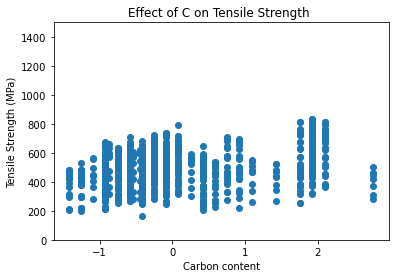

In [12]:
plt.scatter(final_df[' C'],final_df[' Tensile Strength (MPa)'])
plt.ylim([0,1500])
plt.title("Effect of C on Tensile Strength ")
plt.xlabel("Carbon content")
plt.ylabel("Tensile Strength (MPa)")

In [13]:
df.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

Text(0, 0.5, '%Elongation')

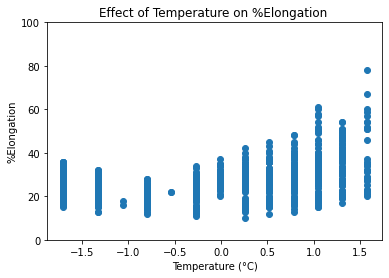

In [14]:
plt.scatter(final_df[' Temperature (°C)'],final_df[' Elongation (%)'])
plt.ylim([0,100])
plt.title("Effect of Temperature on %Elongation ")
plt.xlabel("Temperature (°C)")
plt.ylabel("%Elongation")

**inference:As temp. increases % elongation increases**

In [15]:
numeric_col=[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)']

Text(0.5, 1.0, 'Correlation Matrix')

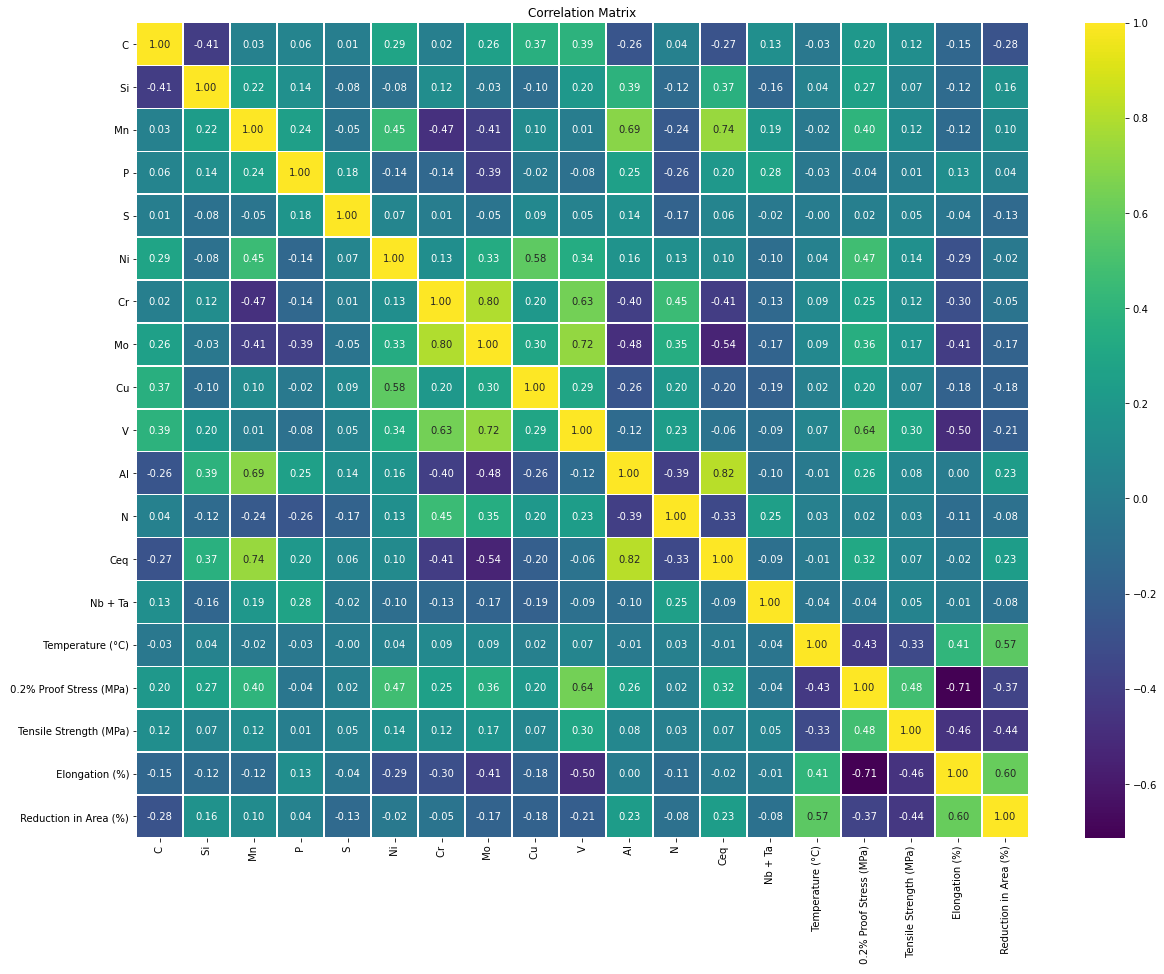

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(final_df[numeric_col].corr(),annot=True,cmap='viridis',linewidths=0.5,fmt='.2f')
plt.title("Correlation Matrix")

Text(0, 0.5, '0.2% Proof Stress (MPa)')

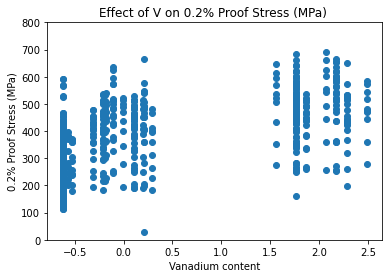

In [17]:
plt.scatter(final_df['V'],final_df[' 0.2% Proof Stress (MPa)'])
plt.ylim([0,800])
plt.title("Effect of V on 0.2% Proof Stress (MPa) ")
plt.xlabel("Vanadium content")
plt.ylabel("0.2% Proof Stress (MPa)")

**inference:marginal increase in proof stress as V increases**

Text(0, 0.5, 'Reduction in Area (%)')

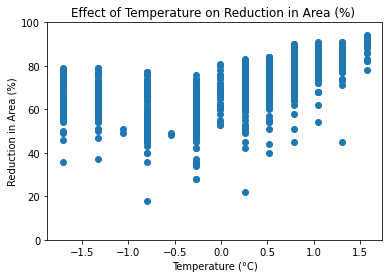

In [18]:
plt.scatter(final_df[' Temperature (°C)'],final_df[' Reduction in Area (%)'])
plt.ylim([0,100])
plt.title("Effect of Temperature on Reduction in Area (%) ")
plt.xlabel("Temperature (°C)")
plt.ylabel("Reduction in Area (%)")

**inference:As temp. increases Reduction in Area (%) increases**

### Data

In [19]:
# sampling the entire dataset
final_df=final_df.sample(frac=1)

In [20]:

X=final_df.drop([' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],axis=1)
y_all=final_df[[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)']]
# For Proof Stress
# y=final_df[' 0.2% Proof Stress (MPa)']

In [21]:
y_all.head()

,0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
689,350,457,27,77
699,375,490,27,74
360,186,330,37,79
473,436,566,21,67
694,513,645,18,60


In [23]:
X.shape,y_all.shape

((915, 110), (915, 4))

In [24]:
X.columns

Index(['ohe__x0_CAA', 'ohe__x0_CAB', 'ohe__x0_CAC', 'ohe__x0_CAG',
       'ohe__x0_CAH', 'ohe__x0_CAJ', 'ohe__x0_CAL', 'ohe__x0_CAM',
       'ohe__x0_CAN', 'ohe__x0_CCA',
       ...
       ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',
       ' Temperature (°C)'],
      dtype='object', length=110)

## 5.Modelling

### 5.1 For 0.2% Proof Stress (MPa)

### Splitting the data into Train and test set
cross-validation will be performed on unseen portion of the training set

In [25]:
# for proof stress
y=y_all[' 0.2% Proof Stress (MPa)']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((686, 110), (229, 110), (686,), (229,))

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


models={
         'Random Forest Regressor':RandomForestRegressor(),
         'Ridge Regression':Ridge(),
        'Support vector machine':SVR(kernel='linear')
        }

def evaluate_models(models,X_train,y_train):
    model_scores={}
    for name,model in models.items():
        model_scores[name]=cross_val_score(model,X_train,y_train,cv=5,n_jobs=-1).mean()
        
    return model_scores
        
def default_parameter_score(score):
    print("The r2_score for various models with default parameters is as follows:")
    for name,value in score.items():
        print(f"{name} : {value:.2}")

In [29]:
scores=evaluate_models(models,X_train,y_train)

In [35]:
default_parameter_score(scores)

The r2_score for various models with default parameters is as follows:
Random Forest Regressor : 0.95
Ridge Regression : 0.85
Support vector machine : 0.83


**Inference:The Random Forest Regressor performs better than others for default hyperparameters**

## Hyperparameter tuning using RandomSearchCV for  Random Forest Regressor,Linear Regression,Ridge Regression and SVM

In [37]:
from sklearn.model_selection import RandomizedSearchCV
grid_rf={'n_estimators':np.arange(10,501,10),
       'max_depth':[x for x in range(2,8,1)],
       'max_features':['auto','sqrt',0.5],
        'min_samples_leaf':np.arange(5,20,1),
         'min_samples_split':np.arange(5,11,1),
          }

grid_rr={'alpha':np.logspace(-4,4,30)
          
}
grid_svm={
    'kernel':['linear',  'rbf'],
    'C':np.logspace(-4,4,30),
    'gamma':['scale','auto'],
    'degree':np.arange(3,7,1)
    
}


model_grids={
         'Random Forest Regressor':[RandomForestRegressor(),grid_rf],
          'Ridge Regression':[Ridge(),grid_rr],
            'SVM':[SVR(),grid_svm],
             }

In [29]:
def evaluate_randomSearchCV(model_grids,X_train,y_train):
    scores={}
    for name,model in model_grids.items():
        rs_model=RandomizedSearchCV(model[0],param_distributions=model[1],cv=5,n_iter=200,n_jobs=-1,verbose=True,return_train_score=True,scoring='r2')
        rs_model.fit(X_train,y_train)
       

        scores[name]=rs_model,rs_model.cv_results_ 
    return scores

In [48]:
%%time
scores_rs=evaluate_randomSearchCV(model_grids,X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.7min finished
C:\Users\shetg\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 30 is smaller than n_iter=200. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 594 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   45.2s finished


Wall time: 2min 28s


In [51]:
print("Cross validation set r2_score for various models is as follows:")
for name,model in scores_rs.items():
    print(f"{name }, score:{model[1]['mean_test_score'].mean():.2f}")

Cross validation set r2_score for various models is as follows:
Random Forest Regressor, score:0.72
Ridge Regression, score:0.76
SVM, score:0.45


In [52]:
print('Test set r2_score for various models is as follows:')
for name,model in scores_rs.items():
    print(f"{name }, score:{model[0].score(X_test,y_test):.2f}")    

Test set r2_score for various models is as follows:
Random Forest Regressor, score:0.94
Ridge Regression, score:0.86
SVM, score:0.96


In [53]:
# parameters for Random Forest Regressor
scores_rs['Random Forest Regressor'][0].best_params_

{'n_estimators': 410,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 7}

In [54]:
# SVM parameters that gave the best results.
scores_rs['SVM'][0].best_params_


{'kernel': 'rbf', 'gamma': 'scale', 'degree': 5, 'C': 5298.316906283702}

**inference:SVM performs better than other models.**

## Hyperparameter tuning using GridSearchCV for SVM

In [38]:
from sklearn.model_selection import GridSearchCV

grid_svm={
    'kernel':['rbf'],
    'C':np.logspace(1,5,50),
    'gamma':['scale','auto'],
    'degree':np.arange(2,5,1)
    
}
model_grids={
              'SVM':[SVR(),grid_svm]
            }
def evaluate_gridSearchCV(model_grids,X_train,y_train):
    scores={}
    for name,model in model_grids.items():
        gs_model=GridSearchCV(model[0],param_grid=model[1],cv=5,n_jobs=-1,verbose=True,return_train_score=True,scoring='r2')
        gs_model.fit(X_train,y_train)
        scores[name]=gs_model,gs_model.cv_results_
        
    return scores

In [66]:
%%time
scores_gs=evaluate_gridSearchCV(model_grids,X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 1368 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.6min finished


Wall time: 1min 38s


In [67]:
print("Cross validation set r2_score for various models is as follows:")
for name,model in scores_gs.items():
    print(f"{name }, score:{model[1]['mean_test_score'].mean():.2f}")

Cross validation set r2_score for various models is as follows:
SVM, score:0.90


In [68]:
print('Test set r2_score for various models is as follows:')
for name,model in scores_gs.items():
    print(f"{name }, score:{model[0].score(X_test,y_test):.2f}")  

Test set r2_score for various models is as follows:
SVM, score:0.96


In [60]:
scores_gs['SVM'][0].best_params_

{'C': 4941.713361323833, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

## Saving the Trained Model

In [70]:
import joblib
joblib.dump(scores_gs['SVM'][0],"trained_model_for_predicting_proof_stress.pkl")

['trained_model_for_predicting_proof_stress.pkl']

## 5.2 For  Tensile Strength (MPa)

### Splitting the data into train and test considering tensile strength.

In [85]:
from sklearn.model_selection import train_test_split
y=y_all[' Tensile Strength (MPa)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [86]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((686, 110), (686,), (229, 110), (229,))

In [89]:
scores=evaluate_models(models,X_train,y_train)
default_parameter_score(scores)

The r2_score for various models with default parameters is as follows:
Random Forest Regressor : 0.47
Ridge Regression : 0.12
Support vector machine : 0.55


**inference:SVM performs better than other models with default hyperparameters.**

## Hyperparameter tuning using RandomSearchCV for  Random Forest Regressor,Linear Regression,Ridge Regression and SVM

In [90]:
grid_rf={'n_estimators':np.arange(10,501,10),
       'max_depth':[x for x in range(2,8,1)],
       'max_features':['auto',0.5,0.6,0.7,0.8,0.9],
        'min_samples_leaf':np.arange(5,20,1),
         'min_samples_split':np.arange(5,11,1),
          }


grid_rr={'alpha':np.logspace(-4,4,40)
    
}
grid_svm={
    'kernel':['linear',  'rbf'],
    'C':np.logspace(1,4,40),
    'gamma':['scale','auto'],
    'degree':np.arange(2,7,1)
    
}


model_grids={
         'Random Forest Regressor':[RandomForestRegressor(),grid_rf],
          'Ridge Regression':[Ridge(),grid_rr],
            'SVM':[SVR(),grid_svm]}

In [91]:
%%time
scores_rs=evaluate_randomSearchCV(model_grids,X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.0min finished
C:\Users\shetg\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 40 is smaller than n_iter=200. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 514 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   51.0s finished


Wall time: 3min 53s


In [92]:
print("Cross validation set r2_score for various models is as follows:")
for name,model in scores_rs.items():
    print(f"{name }, score:{model[1]['mean_test_score'].mean():.2f}")

Cross validation set r2_score for various models is as follows:
Random Forest Regressor, score:0.60
Ridge Regression, score:0.18
SVM, score:0.59


In [93]:
print('Test set r2_score for various models is as follows:')
for name,model in scores_rs.items():
    print(f"{name }, score:{model[0].score(X_test,y_test):.2f}")  

Test set r2_score for various models is as follows:
Random Forest Regressor, score:0.86
Ridge Regression, score:0.61
SVM, score:0.90


In [94]:
scores_rs['SVM'][0].best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 5878.0160722749115}

**inference:SVM performs better than other models.**

## Hyperparameter tuning using GridSearchCV for SVM

In [100]:
grid_svm={
    'kernel':['rbf'],
    'C':np.logspace(3,5,50),
    'gamma':['scale','auto'],
    'degree':np.arange(2,6,1)
    
}
model_grids={
              'SVM':[SVR(),grid_svm]
            }

In [101]:
%%time
scores_gs=evaluate_gridSearchCV(model_grids,X_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  4.2min finished


Wall time: 4min 14s


In [102]:
print("Cross validation set r2_score for various models is as follows:")
for name,model in scores_gs.items():
    print(f"{name }, score:{model[1]['mean_test_score'].mean():.2f}")

Cross validation set r2_score for various models is as follows:
SVM, score:0.75


In [103]:
print('Test set r2_score for various models is as follows:')
for name,model in scores_gs.items():
    print(f"{name }, score:{model[0].score(X_test,y_test):.2f}")  

Test set r2_score for various models is as follows:
SVM, score:0.90


In [104]:
scores_gs['SVM'][0].best_params_

{'C': 5963.623316594642, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

## Saving the Trained Model

In [105]:
import joblib
joblib.dump(scores_gs['SVM'][0],"trained_model_for_predicting_tensile_strength.pkl")

['trained_model_for_predicting_tensile_strength.pkl']

## 5.3 For  Percentage Elongation 

In [39]:
y=y_all[' Elongation (%)']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [41]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((686, 110), (686,), (229, 110), (229,))

In [42]:
scores=evaluate_models(models,X_train,y_train)
default_parameter_score(scores)

The r2_score for various models with default parameters is as follows:
Random Forest Regressor : 0.84
Ridge Regression : 0.45
Support vector machine : 0.45


**Inference:Random Forest Regressor gave better results with default parameters.**

## Hyperparameter tuning using RandomSearchCV for  Random Forest Regressor,Linear Regression,Ridge Regression and SVM

In [43]:
grid_rf={'n_estimators':np.arange(10,501,10),
       'max_depth':[x for x in range(2,8,1)],
       'max_features':['auto','sqrt',0.5,0.6,0.7,0.8,0.9],
        'min_samples_leaf':np.arange(5,20,1),
         'min_samples_split':np.arange(5,11,1),
          }

grid_rr={'alpha':np.logspace(-4,4,40)
    
}
grid_svm={
    'kernel':['linear',  'rbf'],
    'C':np.logspace(-4,4,40),
    'gamma':['scale','auto'],
    'degree':np.arange(2,7,1)
    
}


model_grids={
         'Random Forest Regressor':[RandomForestRegressor(),grid_rf],
          'Ridge Regression':[Ridge(),grid_rr],
            'SVM':[SVR(),grid_svm]
}

In [44]:
%%time
scores_rs=evaluate_randomSearchCV(model_grids,X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.6min finished
C:\Users\shetg\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 40 is smaller than n_iter=200. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 490 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:  1.2min


Wall time: 3min 58s


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.3min finished


In [45]:
print("Cross validation set r2_score for various models is as follows:")
for name,model in scores_rs.items():
    print(f"{name }, score:{model[1]['mean_test_score'].mean():.2f}")

Cross validation set r2_score for various models is as follows:
Random Forest Regressor, score:0.63
Ridge Regression, score:0.41
SVM, score:0.38


In [46]:
print('Test set r2_score for various models is as follows')
for name,model in scores_rs.items():
    print(f"{name}, score:{model[0].score(X_test,y_test):.2f}")  

Test set r2_score for various models is as follows
Random Forest Regressor, score:0.86
Ridge Regression, score:0.54
SVM, score:0.82


In [47]:
scores_rs['Random Forest Regressor'][0].best_params_

{'n_estimators': 350,
 'min_samples_split': 9,
 'min_samples_leaf': 5,
 'max_features': 0.9,
 'max_depth': 7}

In [48]:
scores_rs['SVM'][0].best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 6, 'C': 2424.462017082326}

**Inference:Random Forest Regressor performed better than other models**

## Hyperparameter tuning using GridSearchCV for Random Forest Regressor 

In [94]:
grid_rf={'n_estimators':np.arange(330,451,20),
       'max_depth':[x for x in range(5,8,1)],
       'max_features':[0.8],
        'min_samples_leaf':np.arange(5,8,1),
         'min_samples_split':np.arange(9,13,1)
         
          }


model_grids={
              'Random Forest Regressor':[RandomForestRegressor(),grid_rf]              
    
            }

In [95]:
%%time
scores_gs=evaluate_gridSearchCV(model_grids,X_train,y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:  4.5min finished


Wall time: 4min 30s


In [96]:
print("Cross validation set r2_score for various models is as follows:")
for name,model in scores_gs.items():
    print(f"{name }, score:{model[1]['mean_test_score'].mean():.2f}")

Cross validation set r2_score for various models is as follows:
Random Forest Regressor, score:0.79


In [97]:
print('Test set r2_score for various models is as follows:')
for name,model in scores_gs.items():
    print(f"{name}, score:{model[0].score(X_test,y_test):.2f}")  

Test set r2_score for various models is as follows:
Random Forest Regressor, score:0.86


In [98]:
scores_gs['Random Forest Regressor'][0].best_params_

{'max_depth': 7,
 'max_features': 0.8,
 'min_samples_leaf': 5,
 'min_samples_split': 9,
 'n_estimators': 410}

## Saving the Trained Model

In [100]:
import joblib
joblib.dump(scores_gs['Random Forest Regressor'][0],"trained_model_for_predicting_per_elongation.pkl")

['trained_model_for_predicting_per_elongation.pkl']

## 5.4 For  Percentage Reduction in Area

In [101]:
y=y_all[' Reduction in Area (%)']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [102]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((732, 110), (183, 110), (732,), (183,))

In [103]:
scores=evaluate_models(models,X_train,y_train)
default_parameter_score(scores)

The r2_score for various models with default parameters is as follows:
Random Forest Regressor : 0.85
Ridge Regression : 0.46
Support vector machine : 0.46


**Inference:Random Forest Regressor performs better than other models with default parameters.**

## Hyperparameter tuning using RandomSearchCV for  Random Forest Regressor,Linear Regression,Ridge Regression and SVM

In [104]:
grid_rf={'n_estimators':np.arange(10,501,10),
       'max_depth':[x for x in range(2,8,1)],
       'max_features':['auto','sqrt',0.5],
        'min_samples_leaf':np.arange(5,20,1),
         'min_samples_split':np.arange(5,11,1),
          }

grid_rr={'alpha':np.logspace(-4,4,40)
    
}
grid_svm={
    'kernel':['linear',  'rbf'],
    'C':np.logspace(-4,4,40),
    'gamma':['scale','auto'],
    'degree':np.arange(2,7,1)
    
}


model_grids={
         'Random Forest Regressor':[RandomForestRegressor(),grid_rf],
          'Ridge Regression':[Ridge(),grid_rr],
            'SVM':[SVR(),grid_svm]
}

In [105]:
%%time
scores_rs=evaluate_randomSearchCV(model_grids,X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished
C:\Users\shetg\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 40 is smaller than n_iter=200. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 602 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   40.8s


Wall time: 2min 40s


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   48.8s finished


In [106]:
print("Cross validation set r2_score for various models is as follows:")
for name,model in scores_rs.items():
    print(f"{name }, score:{model[1]['mean_test_score'].mean():.2f}")

Cross validation set r2_score for various models is as follows:
Random Forest Regressor, score:0.57
Ridge Regression, score:0.40
SVM, score:0.31


In [107]:
print('Test set r2_score for various models is as follows:')
for name,model in scores_rs.items():
    print(f"{name}, score:{model[0].score(X_test,y_test):.2f}") 

Test set r2_score for various models is as follows:
Random Forest Regressor, score:0.82
Ridge Regression, score:0.52
SVM, score:0.84


In [108]:
scores_rs['SVM'][0].best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 228.54638641349885}

**Inference:SVM performs better than other models.**

## Hyperparameter tuning using GridSearchCV for  SVM

In [115]:
# grid_rf={'n_estimators':np.arange(340,401,10),
#        'max_depth':[x for x in range(5,7,1)],
#        'max_features':['auto'],
#         'min_samples_leaf':np.arange(6,9,1),
#          'min_samples_split':np.arange(6,11,1),
#           }
grid_svm={
    'kernel':['rbf'],
    'C':np.logspace(2,4,150),
    'gamma':['scale','auto'],
    'degree':np.arange(2,5,1)
    
}

model_grids={
#               'Random Forest Regressor':[RandomForestRegressor(),grid_rf],
                'SVM':[SVR(),grid_svm]
    
            }

In [116]:
%%time
scores_gs=evaluate_gridSearchCV(model_grids,X_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 3392 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  2.8min


Wall time: 4min 3s


[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  4.1min finished


In [119]:
print("Cross validation set r2_score for various models is as follows:")
for name,model in scores_gs.items():
    print(f"{name }, score:{model[1]['mean_test_score'].mean():.2f}")

Cross validation set r2_score for various models is as follows:
SVM, score:0.74


In [120]:
print('Test set r2_score for various models is as follows:')
for name,model in scores_gs.items():
    print(f"{name}, score:{model[0].score(X_test,y_test):.2f}")  

Test set r2_score for various models is as follows:
SVM, score:0.84


In [121]:
scores_gs['SVM'][0].best_params_

{'C': 277.30201165910637, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

**Inference:SVM performs better than other models.**

## Saving the Trained Model

In [122]:
import joblib
joblib.dump(scores_gs['SVM'][0],"trained_model_for_predicting_per_reduc_in_area.pkl")

['trained_model_for_predicting_per_reduc_in_area.pkl']